In [26]:
# import modules
import csv
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [27]:
# read csv file
file_path1 = os.path.join('HUD_Cities_Data.csv')
file_path2 = os.path.join('data','zillow_data','18_zillow_selected_cities_mean.csv')
file_path3 = os.path.join('HUD_Consol_Data.csv')
# place csv data into a DataFrame
hud_city_df = pd.read_csv(file_path1)
zillow_df = pd.read_csv(file_path2)
hud_consol_df = pd.read_csv(file_path3)

In [28]:
hud_consol_df.head()

,Year,CityState,State,County,Total Homeless,Sheltered Homeless,Unsheltered Homeless,Homeless Individuals,Sheltered Homeless Individuals,Unsheltered Homeless Individuals,Homeless People in Families,Sheltered Homeless People in Families,Unsheltered Homeless People in Families,Chronically Homeless Individuals,Sheltered Chronically Homeless Individuals,Unsheltered Chronically Homeless Individuals
0,2017,"Anchorage, AK",AK,Anchorage,1128,973,155,848,693,155,280,280,0,114,70,44
1,2017,"Alaska, AK",AK,Alaska,717,578,139,506,367,139,211,211,0,102,47,55
2,2017,"Birmingham, AL",AL,Birmingham,1092,875,217,932,715,217,160,160,0,89,28,61
3,2017,"Mobile, AL",AL,Mobile,606,341,265,426,179,247,180,162,18,65,9,56
4,2017,"Florence, AL",AL,Florence,155,133,22,155,133,22,0,0,0,24,10,14


In [29]:
# group data by year
hud_consol_df["Total Homeless"] = pd.to_numeric(hud_consol_df["Total Homeless"], errors='coerce')
hud_consolgroup_data = hud_consol_df.groupby("Year")["Total Homeless"].sum()
hud_consolgroup_data

Year
2007    647258.0
2008    639784.0
2009    630227.0
2010    637077.0
2011    623788.0
2012    621553.0
2013    590364.0
2014    576450.0
2015    564708.0
2016    549928.0
2017    553742.0
Name: Total Homeless, dtype: float64

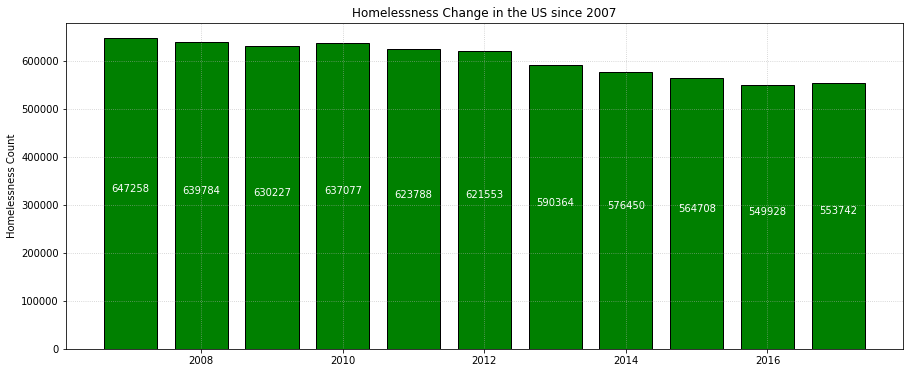

In [5]:
# Homelessness Change in the US since 2007
# Set values for X, Y axis and bar width
fig = plt.figure(figsize=(15,6))
x = hud_consolgroup_data.index
y = hud_consolgroup_data
bar_width = 0.75
edgecolor = 'black'

# Plot Bar Chart        
bars = plt.bar(x, y, bar_width, color="g", ec=edgecolor, lw=1)

# Set Graph Properties
plt.ylabel('Homelessness Count')
plt.title('Homelessness Change in the US since 2007') 
plt.grid(True,linestyle=':', alpha=0.7)

# plt.xticks(tick_locations, cities)
# Set the bar value inside each bar
for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., 0.5*height,
                '%s' % (str(int(height))),
                ha='center', va='bottom', color="white")
# Save the figure
plt.savefig("Homelessness_Summary.png")

# Show graph
plt.show()

In [30]:
hud_state_group = hud_consol_df.groupby(["State"])["Total Homeless"].sum()
hud_state_group.sort_values(ascending=False).head()

State
CA    1368563.0
NY     805535.0
FL     514287.0
TX     351281.0
WA     229496.0
Name: Total Homeless, dtype: float64

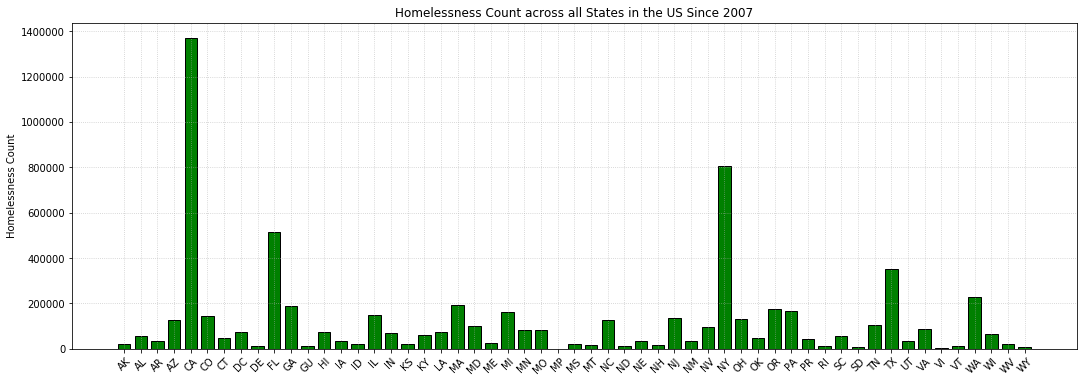

In [7]:
# Homelessness Count across all States in the US since 2007
# Set values for X, Y axis and bar width
fig = plt.figure(figsize=(18,6))
x = hud_state_group.index
y = hud_state_group
bar_width = 0.75
edgecolor = 'black'

# Plot Bar Chart        
bars = plt.bar(x, y, bar_width, color="g", ec=edgecolor, lw=1)

# Set Graph Properties
plt.ylabel('Homelessness Count')
plt.title('Homelessness Count across all States in the US Since 2007') 
plt.grid(True,linestyle=':', alpha=0.7)
plt.xticks(x, hud_state_group.index, rotation=45)
# Save the figure
plt.savefig("Homelessness_State_Summary.png")

# Show graph
plt.show()

In [31]:
hud_change_df = hud_consol_df[hud_consol_df["Year"].isin([2007,2017])]
hud_change_group = hud_change_df.groupby(["Year","State"])["Total Homeless"].sum()
hud_df = pd.DataFrame(hud_change_group)
hud_df = hud_df.reset_index()
hud_df = hud_df.pivot(index='State', columns='Year', values='Total Homeless')
hud_df.head()

Year,2007,2017
State,,
AK,1642.0,1845.0
AL,5452.0,3793.0
AR,3836.0,2467.0
AZ,14646.0,8947.0
CA,138986.0,134278.0


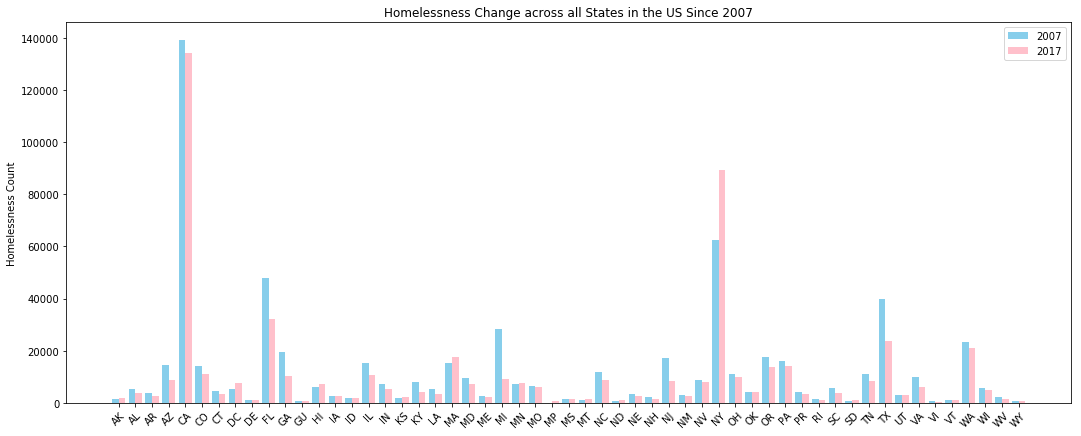

In [32]:
# Homelessness Change Summary
ind = np.arange(len(hud_df[2007]))  # the x locations for the groups
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize=(18,7))
rects1 = ax.bar(ind - width/2, hud_df[2007], width, color='SkyBlue', label='2007')
rects2 = ax.bar(ind + width/2, hud_df[2017], width, color='Pink', label='2017')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Homelessness Count')
ax.set_title('Homelessness Change across all States in the US Since 2007')
ax.set_xticks(ind)
ax.set_xticklabels((hud_df.index),rotation=45)
ax.legend()

# Save the figure
plt.savefig("Homelessness_Change_Summary.png")

# Show graph
plt.show()

In [10]:
hud_city_df.head()

,Year,CityState,Total Homeless,Sheltered Homeless,Unsheltered Homeless,Homeless Individuals,Sheltered Homeless Individuals,Unsheltered Homeless Individuals,Homeless People in Families,Sheltered Homeless People in Families,Unsheltered Homeless People in Families,Chronically Homeless Individuals,Sheltered Chronically Homeless Individuals,Unsheltered Chronically Homeless Individuals
0,2007,"Anchorage, AK",974,842,132,696,589,107,278,253,25,224,187,37
1,2008,"Anchorage, AK",1023,921,102,695,596,99,328,325,3,300,239,61
2,2009,"Anchorage, AK",1267,1110,157,821,689,132,446,421,25,198,152,46
3,2010,"Anchorage, AK",1231,1113,118,740,633,107,491,480,11,56,43,13
4,2011,"Anchorage, AK",1223,1082,141,794,677,117,429,405,24,112,94,18


In [33]:
zillow_df = zillow_df.fillna(0)
zillow_df.head()

,CityState,Year,MedianSoldPricePerSqft_AllHomes,MedianSoldPricePerSqft_SingleFamilyResidence,MedianSoldPrice_AllHomes,ZHVIPerSqft_AllHomes,ZHVI_AllHomes,ZHVI_SingleFamilyResidence
0,"Anchorage, AK",2007,0.0,0.0,0.0,201.333333,300758.333333,325150.000000
1,"Anchorage, AK",2008,0.0,0.0,0.0,199.500000,296191.666667,319466.666667
2,"Anchorage, AK",2009,0.0,0.0,0.0,185.416667,272291.666667,294341.666667
3,"Anchorage, AK",2010,0.0,0.0,0.0,175.333333,259766.666667,282025.000000
4,"Anchorage, AK",2011,0.0,0.0,0.0,173.500000,260233.333333,282508.333333


In [34]:
hud_zillow_df = hud_city_df.merge(zillow_df, on=["CityState", "Year"])
print(hud_zillow_df.count())
hud_zillow_df.head()

Year                                            176
CityState                                       176
Total Homeless                                  176
Sheltered Homeless                              176
Unsheltered Homeless                            176
Homeless Individuals                            176
Sheltered Homeless Individuals                  176
Unsheltered Homeless Individuals                176
Homeless People in Families                     176
Sheltered Homeless People in Families           176
Unsheltered Homeless People in Families         176
Chronically Homeless Individuals                176
Sheltered Chronically Homeless Individuals      176
Unsheltered Chronically Homeless Individuals    176
MedianSoldPricePerSqft_AllHomes                 176
MedianSoldPricePerSqft_SingleFamilyResidence    176
MedianSoldPrice_AllHomes                        176
ZHVIPerSqft_AllHomes                            176
ZHVI_AllHomes                                   176
ZHVI_SingleF

,Year,CityState,Total Homeless,Sheltered Homeless,Unsheltered Homeless,Homeless Individuals,Sheltered Homeless Individuals,Unsheltered Homeless Individuals,Homeless People in Families,Sheltered Homeless People in Families,Unsheltered Homeless People in Families,Chronically Homeless Individuals,Sheltered Chronically Homeless Individuals,Unsheltered Chronically Homeless Individuals,MedianSoldPricePerSqft_AllHomes,MedianSoldPricePerSqft_SingleFamilyResidence,MedianSoldPrice_AllHomes,ZHVIPerSqft_AllHomes,ZHVI_AllHomes,ZHVI_SingleFamilyResidence
0,2007,"Anchorage, AK",974,842,132,696,589,107,278,253,25,224,187,37,0.0,0.0,0.0,201.333333,300758.333333,325150.000000
1,2008,"Anchorage, AK",1023,921,102,695,596,99,328,325,3,300,239,61,0.0,0.0,0.0,199.500000,296191.666667,319466.666667
2,2009,"Anchorage, AK",1267,1110,157,821,689,132,446,421,25,198,152,46,0.0,0.0,0.0,185.416667,272291.666667,294341.666667
3,2010,"Anchorage, AK",1231,1113,118,740,633,107,491,480,11,56,43,13,0.0,0.0,0.0,175.333333,259766.666667,282025.000000
4,2011,"Anchorage, AK",1223,1082,141,794,677,117,429,405,24,112,94,18,0.0,0.0,0.0,173.500000,260233.333333,282508.333333


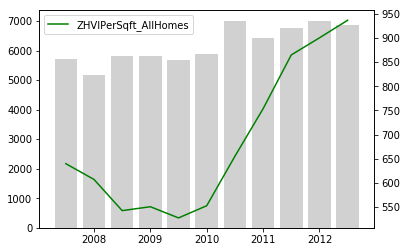

In [13]:
sfo_df = hud_zillow_df[hud_zillow_df.CityState == "San Francisco, CA"]

#ax = selected_new_df[['Year', 'ZHVIPerSqft_AllHomes']].plot(x='Year', linestyle='-', marker='o')
#selected_new_df[['Year', 'Total Homeless']].plot(x='Year', kind='bar', ax=ax)

fig, ax = plt.subplots()

ax2 = ax.twinx()

ax.bar(sfo_df['Year'], sfo_df["Total Homeless"], color=(190/255,190/255,190/255,0.7), label='Total Homeless')

ax2.plot(sfo_df['Year'], sfo_df["ZHVIPerSqft_AllHomes"], color='green', label='ZHVIPerSqft_AllHomes')

ax.set_xticklabels(sfo_df['Year'])

#ax.legend(loc='best')
ax2.legend(loc='best')

plt.show()

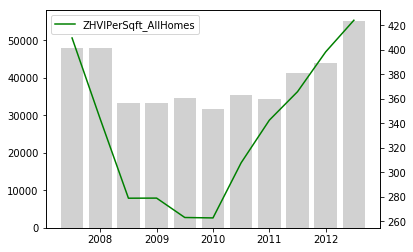

In [14]:
LA_df = hud_zillow_df[hud_zillow_df.CityState == "Los Angeles, CA"]

#ax = selected_new_df[['Year', 'ZHVIPerSqft_AllHomes']].plot(x='Year', linestyle='-', marker='o')
#selected_new_df[['Year', 'Total Homeless']].plot(x='Year', kind='bar', ax=ax)

fig, ax = plt.subplots()

ax2 = ax.twinx()

ax.bar(LA_df['Year'], LA_df["Total Homeless"], color=(190/255,190/255,190/255,0.7), label='Total Homeless')

ax2.plot(LA_df['Year'], LA_df["ZHVIPerSqft_AllHomes"], color='green', label='ZHVIPerSqft_AllHomes')

ax.set_xticklabels(LA_df['Year'])

#ax.legend(loc='best')
ax2.legend(loc='best')

plt.show()

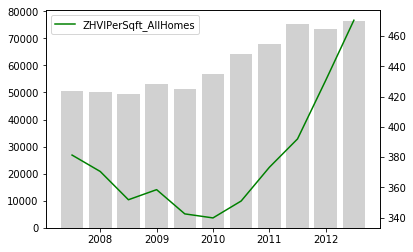

In [15]:
NY_df = hud_zillow_df[hud_zillow_df.CityState == "New York, NY"]

#ax = selected_new_df[['Year', 'ZHVIPerSqft_AllHomes']].plot(x='Year', linestyle='-', marker='o')
#selected_new_df[['Year', 'Total Homeless']].plot(x='Year', kind='bar', ax=ax)

fig, ax = plt.subplots()

ax2 = ax.twinx()

ax.bar(NY_df['Year'], NY_df["Total Homeless"], color=(190/255,190/255,190/255,0.7), label='Total Homeless')

ax2.plot(NY_df['Year'], NY_df["ZHVIPerSqft_AllHomes"], color='green', label='ZHVIPerSqft_AllHomes')

ax.set_xticklabels(NY_df['Year'])

#ax.legend(loc='best')
ax2.legend(loc='best')

plt.show()